## Day 21 Lecture 2 Assignment

In this assignment, we will apply techniques for identifying and dealing with outliers to a dataset containing information about Uber rides.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
uber_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/uber_rides.csv')

In [3]:
uber_data.head()

,trip_uid,trip_time,total_time,wait_time,price_rub,price_usd,distance_kms,temperature_value,feels_like,humidity,wind_speed,cloudness
0,ee89076fd9da9bddf5f096b0ca42f8d5,0:21:33,0:29:00,0:07:27,265,5.17,9.29,12,12,0.69,4.81,0.78
1,518be51d403944a03c47e8d1f2c87311,0:19:27,0:26:00,0:06:33,255,4.97,9.93,10,10,0.70,6.53,0.66
2,6e460cc8a12c3c6568d0d4a67ac58393,1:06:53,1:23:00,0:16:07,644,13.01,18.01,14,14,0.61,5.25,0.86
3,49613a86a04e6c15d72b51d1a2935d81,0:13:37,0:20:00,0:06:23,1287,25.99,5.10,3,3,0.84,0.87,0.56
4,9896148fdecdb4c5d977a8691510bdb6,0:38:54,0:49:00,0:10:06,665,13.43,21.92,3,1,0.90,1.61,0.31


Before we identify outliers in the given columns, we need to address three time columns (trip_time, total_time, and wait_time), which are provided as formatted strings (HH:MM:SS) instead of numeric values. Convert the values in these three columns into their numeric equivalents in minutes - "2:15" should be converted to "2.25", "1:22:30" should be converted to "82.5", and so on. You may find it helpful to write a function that does this and use the .apply() function to apply it to all of the necessary columns.

In [4]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   trip_uid           678 non-null    object 
 1   trip_time          678 non-null    object 
 2   total_time         678 non-null    object 
 3   wait_time          678 non-null    object 
 4   price_rub          678 non-null    object 
 5   price_usd          678 non-null    float64
 6   distance_kms       678 non-null    float64
 7   temperature_value  678 non-null    int64  
 8   feels_like         678 non-null    int64  
 9   humidity           678 non-null    float64
 10  wind_speed         678 non-null    float64
 11  cloudness          678 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 63.7+ KB


In [5]:
#uber_data.info()

# answer goes here

for time in uber_data.filter(like='_time').columns:
  hour = uber_data[time].apply(lambda s: int(s.split(':')[0]))
  minute = uber_data[time].apply(lambda s: int(s.split(':')[1]))
  second = uber_data[time].apply(lambda s: int(s.split(':')[2]))
  uber_data[time] = (hour * 60) + minute + (second / 60)

In [6]:
uber_data.head()


,trip_uid,trip_time,total_time,wait_time,price_rub,price_usd,distance_kms,temperature_value,feels_like,humidity,wind_speed,cloudness
0,ee89076fd9da9bddf5f096b0ca42f8d5,21.550000,29.0,7.450000,265,5.17,9.29,12,12,0.69,4.81,0.78
1,518be51d403944a03c47e8d1f2c87311,19.450000,26.0,6.550000,255,4.97,9.93,10,10,0.70,6.53,0.66
2,6e460cc8a12c3c6568d0d4a67ac58393,66.883333,83.0,16.116667,644,13.01,18.01,14,14,0.61,5.25,0.86
3,49613a86a04e6c15d72b51d1a2935d81,13.616667,20.0,6.383333,1287,25.99,5.10,3,3,0.84,0.87,0.56
4,9896148fdecdb4c5d977a8691510bdb6,38.900000,49.0,10.100000,665,13.43,21.92,3,1,0.90,1.61,0.31


Plot histograms for each of the column, excluding the trip ID. Which features appear to have outliers? What do you suspect the nature of these outliers is (i.e. do you think these are most likely data errors, or correct values that are simply unusually large or small?)

In [7]:
# answer goes here
uber_hists = uber_data.drop('trip_uid', axis=1)

In [8]:
uber_hists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   trip_time          678 non-null    float64
 1   total_time         678 non-null    float64
 2   wait_time          678 non-null    float64
 3   price_rub          678 non-null    object 
 4   price_usd          678 non-null    float64
 5   distance_kms       678 non-null    float64
 6   temperature_value  678 non-null    int64  
 7   feels_like         678 non-null    int64  
 8   humidity           678 non-null    float64
 9   wind_speed         678 non-null    float64
 10  cloudness          678 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 58.4+ KB


In [9]:
uber_hists['price_rub'] = pd.to_numeric(uber_hists['price_rub'], errors='coerce')
uber_hists[uber_hists['price_rub'].isna()]
uber_hists = uber_hists[uber_hists['price_rub'].notnull()]
# uber_hists['price_rub'].isna().mean()
# uber_hists['price_rub'] = uber_hists.dropna()
uber_hists.price_rub.isna().sum()

0

In [10]:
uber_hists['price_rub'].isna().sum()

0

In [11]:
uber_hists['cloudness'] = pd.to_numeric(uber_hists['cloudness'], errors='coerce')
uber_hists[uber_hists['cloudness'].isna()]
uber_hists = uber_hists[uber_hists['cloudness'].notnull()]

uber_hists.cloudness.isna().sum()

0

In [12]:
uber_hists.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 675 entries, 0 to 677
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   trip_time          675 non-null    float64
 1   total_time         675 non-null    float64
 2   wait_time          675 non-null    float64
 3   price_rub          675 non-null    float64
 4   price_usd          675 non-null    float64
 5   distance_kms       675 non-null    float64
 6   temperature_value  675 non-null    int64  
 7   feels_like         675 non-null    int64  
 8   humidity           675 non-null    float64
 9   wind_speed         675 non-null    float64
 10  cloudness          675 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 63.3 KB


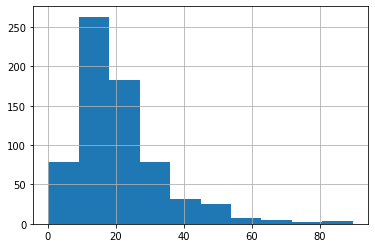

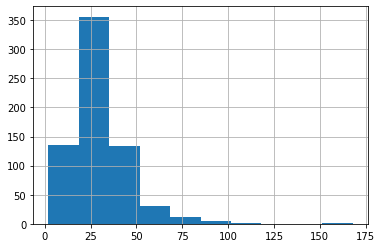

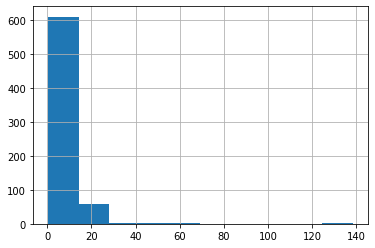

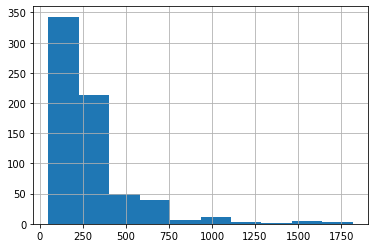

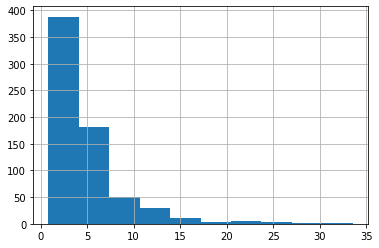

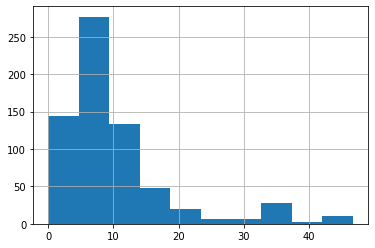

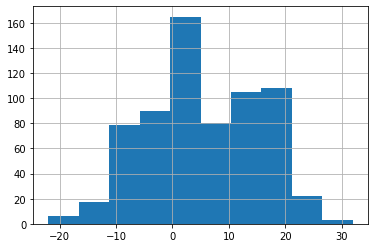

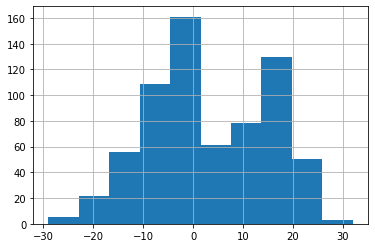

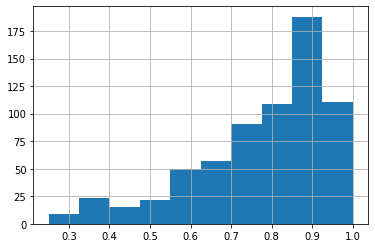

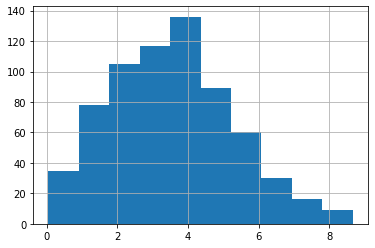

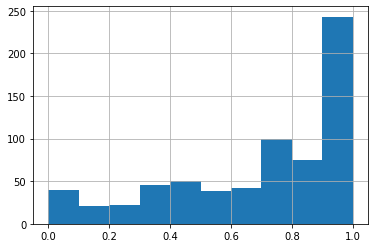

In [13]:
for col in uber_hists:
  uber_hists[col].hist()
  plt.show()

Using Tukey's IQR method and a threshold value of 1.5, how many trips have trip_time values that are identified as outliers? Print these trips out.

In [23]:
# answer goes here
p75, p25 = np.percentile(uber_hists["trip_time"], [75 ,25])
iqr = p75 - p25
min = p25 - (iqr * 1.5)
max = p75 + (iqr * 1.5)
# out_count = 0
outliers_df = uber_hists
for time in uber_hists['trip_time']:
  if min < time < max:
    outliers_df = outliers_df.drop(outliers_df.loc[outliers_df['trip_time'] == time].index)


In [26]:
outliers_df

,trip_time,total_time,wait_time,price_rub,price_usd,distance_kms,temperature_value,feels_like,humidity,wind_speed,cloudness
2,66.883333,83.0,16.116667,644.00,13.01,18.01,14,14,0.61,5.25,0.86
13,50.216667,64.0,13.783333,228.00,4.20,9.41,29,31,0.63,5.11,0.75
29,68.066667,88.0,19.933333,1500.00,27.29,21.22,16,16,0.66,5.75,0.62
45,48.216667,57.0,8.783333,1800.00,33.55,19.14,15,15,0.41,5.95,0.46
47,62.016667,77.0,14.983333,593.00,10.46,15.63,14,14,0.91,4.70,0.79
79,53.216667,60.0,6.783333,518.00,7.84,13.78,16,16,0.67,4.67,0.75
106,51.050000,57.0,5.950000,1000.00,15.43,36.50,9,6,0.65,4.82,0.31
108,85.316667,103.0,17.683333,1000.00,16.00,46.04,-3,-3,0.97,0.95,0.18
117,71.200000,81.0,9.800000,669.00,10.17,17.32,-2,-7,0.75,4.86,0.84
201,47.966667,57.0,9.033333,349.00,5.28,9.54,21,21,0.82,2.64,0.80


There are various ways of handling outliers, including "clipping" (also called "winsorizing"). Clip the outliers to the appropriate upper/lower threshold calculated as part of Tukey's method. Plot the histogram for trip_time after clipping; how does it look different?

In [27]:
# answer goes here
from scipy.stats.mstats import winsorize

In [40]:
# 68.3 + 13.6
# 100-81.999

winsorized_trip_time = winsorize(uber_hists['trip_time'], (0, 0.09))


In [41]:
type(winsorized_trip_time)

numpy.ma.core.MaskedArray

(array([ 15.,  42.,  93.,  94., 126.,  65.,  81.,  41.,  35.,  83.]),
 array([ 0.15 ,  3.955,  7.76 , 11.565, 15.37 , 19.175, 22.98 , 26.785,
        30.59 , 34.395, 38.2  ]),
 <a list of 10 Patch objects>)

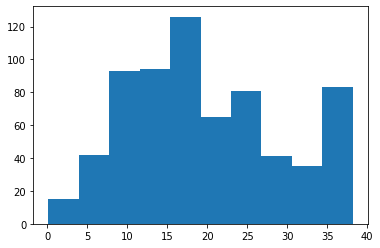

In [42]:
plt.hist(winsorized_trip_time)

In [32]:
100-81.999


18.001000000000005